# Exploratory Data Analysis using Python - A Real World Case Study

#### Analyzing responses from the Stack Overflow Annual Developer Survey 2020

### Exploratory Data Analysis - Approach

#### Exploratory Data Analysis (EDA) is an approach or philosophy for data analysis that employs a variety of techniques (mostly graphical) to 

    - Maximize insight into a data set
    - Uncover underlying structure
    - Extract important variables
    - Detect outliers and anomalies
    - Test underlying assumptions
    - Develop parsimonious models
    - Determine optimal factor settings
    - Show these assumptions by some visuals

### The following procedures are done in this analysis

    - Selecting and downloading a dataset
    - Data preparation and cleaning
    - Exploratory Analysis and Visualization
    - Asking and answering some interesting questions about the dataset
    - Summerizing inferences and drawing conclusions

### How to run the code

This tutorial is an executable [Jupyter notebook](https://jupyter.org) hosted on [Jovian](https://www.jovian.ai). You can run this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.

#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results, e.g., numbers, messages, graphs, tables, files, etc., instantly within the notebook. Jupyter is a powerful platform for experimentation and analysis. Don't be afraid to mess around with the code & break things - you'll learn a lot by encountering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top.

### Introduction

In this project, analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey condected by StackOverflow.Find the raw data and official analysis here : https://insights.stackoverflow.com/survey

There are several options available for getting the dataset add into jupyter Environment.

> - Download the CSV file manually and upload it via Jupyter's GUI
> - Use the urlretrive function from the urllib.request to download CSV files from a raw URL
> - Use as helper library of python, called [`opendatasets`](https://github.com/JovianML/opendatasets), which contains a collection of curated datasets and provides a helper function for direct download.

Here use the `opendatasets` helper library to download the file. 

In [4]:
pip install opendatasets --upgrade

In [5]:
import opendatasets as od

In [6]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_public.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\survey_results_schema.csv
Using downloaded and verified file: .\stackoverflow-developer-survey-2020\README.txt


In [7]:
import os
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

Go through the downloaded files using File -> Open menu option in Jupyter Notebook. It shows that the dataset contains three files :

> - `README.txt` - Information about the dataset
> - `survey_results_public.csv` - The full list of responses to the questions
> - `survey_results_schema.csv` - The list of questions, and shortcodes for each question.

Let's load the CSV files using Pandas library. Use the name `survey_raw_df` for the data frame to indicate that it is a unprocessed data that might to be clean, filter and modify to prepare a data frame ready for analysis.

In [3]:
# Import pandas
import pandas as pd

In [4]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [5]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64000 responses to 60 questions. The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondant ID.


In [6]:
# View the list of columns of the dataset
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that short codes for questions are used as column names.

Now refer to the schema file to see the full text of each question. The schema file contains only two columns - `Column` and `QuestionText`, so it to be load as pandas series width `Column` as the index and the `QuestionText` as the value.

In [7]:
schema_df = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [12]:
schema_raw_df = pd.read_csv(schema_df, index_col='Column').QuestionText

In [13]:
schema_raw_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

Now use the `schema_raw_df` to retrive the full question text for any column in `survey_raw_df`

In [14]:
schema_raw_df['YearsCode']

'Including any education, how many years have you been coding in total?'

Now loaded the dataset is completed, and ready to move on to the neat steop of data preprocessing and cleaning the data for the analysis.

### Save and upload the work

Wheather running this Jupyter notebook on an online service like `Binder` or on to local machine, it is important to save the work from time to time, so that it can be accessed later. or share it online, or with friends and colleagues to let execute the code. Upload this notebook to Jovian.ml account using the `jovian` Python library. [Jovian]('https://www.jovian.ai') offers an easy way of saving and sharing Jupyter notebooks online.

In [15]:
# Select suitable project name
project = 'EDA-python-stackoverflow-annual_survey'

In [16]:
# Install the jovian library
!pip install jovian --upgrade

In [17]:
import jovian
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "joybarai09/EDA-python-stackoverflow-annual_survey"
[jovian] Committed successfully! https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey


'https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey'

First time run the `jovian.commit`, it will be asked an API Key to securely upload the notebook to your Jovian account. Get the API key from [Jovian Profile Page]('https://jovian.ai') after loggingin / signing up.

`jovian.commit` uploads the notebook to [Jovian.ml]('https://www.jovian.ai') account, captures the Python environment, and creates a shareable link for the notebook. Use this link to share the work let anyone run the notebooks and reproduce the work.

### Data Preparation and Cleaning

While the survey responses contain a wealth of information, conducted the analysis to the following areas:
 - Demographics of the survey respondents and the global programming community
 - Distribution of programming skills, experience and preferences
 - Employment-related information, preferences and opinions
 
Let's select a subset of columns with the relevent data for the analysis.

In [21]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [22]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`, which can be continue to modify further without affecting the original data frame.

In [23]:
survey_df = survey_raw_df[selected_columns].copy()

In [24]:
schema_df = schema_raw_df[selected_columns]

Let's view some basic information about the copied data frame.

In [25]:
survey_df.shape

(64461, 20)

In [28]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [30]:
schema_df.shape

(20,)

In [32]:
schema_df

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [34]:
# Check the column data types
schema_df.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [35]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [36]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [37]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Most of the columns have the data type `object`, either because they contain values of different types or contain empty values `(NaN)`. It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). Need to deal with empty values and manually adjust the data type for each column an a case-by-case basis.

Only two of the columns are detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make the analysis easier, let's convert some other columns into numeric data types while ignoring ant non-numeric value. The non-numeric are converted to `NaN`.

In [38]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Now view some basic statistics about the numeric columns.

In [39]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. Can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [40]:
# Drop those columns which have Age less than 10
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)

In [41]:
# Drop those columns which have Age greater than 100
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [42]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [43]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


The gender column also allows for picking multiple options. Remove the values which containing more than one option to simplify the analysis.

In [46]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

The `Gender` column have multiple values, basically it's content only two values, this is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. So ite need to be fixed. In this analysis need three values 'Man', 'Woman' and 'non-confirming'. And except these values the other values need to be filtered.

For this type of cleaning purpose numpy library is very helpful.
First import the `numpy` as `np`, which is most common aliases used.
After that uses where function, that can filtered the values. The `Gender` Column datatype is `object`, consists string values.

In [53]:
import numpy as np

In [54]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

The values are string type and separated by ';', so need to drop these values which contains ';'. Which return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy. NaN, gets mapped to True values. 

Now cleaned up and prepared the dataset for analysis has been completed. Let's take a look at a sample of rows from the data frame.

In [55]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
46346,Norway,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,7.0,2.0,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,C#;Go;HTML/CSS;JavaScript;Python;SQL;TypeScript,Once a year,Visit Stack Overflow,Employed full-time,"Developer, full-stack;Engineer, data",38.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
18268,United Kingdom,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,9.0,3.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,HTML/CSS;JavaScript;Kotlin;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
11633,United States,16.0,Man,Primary/elementary school,NaN,Yes,13.0,3.0,NaN,C++;HTML/CSS;Java;JavaScript;Python,C++;Java,Every few months,Play games;Visit Stack Overflow;Watch help / t...,Student,NaN,NaN,NaN,"Industry that I’d be working in;Languages, fra...",NaN,NaN
47260,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,13.0,12.0,6.0,C#;HTML/CSS;Java;JavaScript;SQL,C#;Go;Haskell;HTML/CSS;Java;JavaScript;Rust;SQL,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,Specific department or team I’d be working on;...,Rarely: 1-2 days per year or less,Very important
19546,United States,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,22.0,8.0,3.0,Bash/Shell/PowerShell;C#;C++;Python,Bash/Shell/PowerShell;C#;C++;Python;SQL,Every few months,Go for a walk or other physical activity;Panic...,Employed full-time,Academic researcher;Data scientist or machine ...,42.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Very important
16666,Israel,40.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,9.0,17.0,14.0,Bash/Shell/PowerShell;C;C++;Python;SQL,C++;Python;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, back-end;Educat...",43.0,Neither satisfied nor dissatisfied,Diversity of the company or organization;Offic...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
8517,Netherlands,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,19.0,10.0,C#;C++;HTML/CSS;JavaScript;SQL;TypeScript,C#;C++;JavaScript;SQL;TypeScript,Every few months,Meditate;Call a coworker or friend;Visit Stack...,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",36.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Somewhat important
7323,Malaysia,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,18.0,10.0,NaN,NaN,NaN,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Designer,NaN,NaN,NaN,NaN,Critically important
29177,India,NaN,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",Yes,19.0,12.0,10.0,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Once every few years,Call a cow

In [56]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Let's save and commit the work before continuing.

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joybarai09/eda-python-stackoverflow-annual-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey


'https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey'

### Exploratory Data Analysis and Visualization

Before ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education lavel, employment level etc. It is essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias]('https://en.wikipedia.org/wiki/Selection_bias').

Let's begin by omporting `matplotlib.pyplot` and `seaborn` libraries.

In [62]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12 ,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's check at the number of countries from which there are presonses in the survey and plot the ten countries with the highest number of responses.

In [63]:
schema_df.Country

'Where do you live?'

In [64]:
survey_df.Country.nunique()

183

Now can identify the countries with the highest number of respondents using `value_counts` method.

In [65]:
top_respondent_country = survey_df.Country.value_counts().head(15)

In [66]:
top_respondent_country

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Now visualize this information using a bar chart.

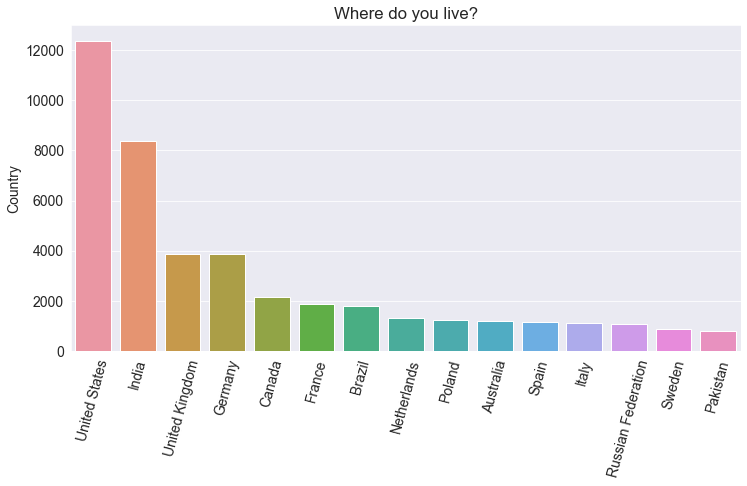

In [68]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_df.Country)
sns.barplot(x=top_respondent_country.index, y=top_respondent_country);

It appears that a disproportionately high number of respondents are from the US, India and United Kingdom, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

### Age

The distribution of respondents' age is another crucial factor to look at. Use a histogram to visualize this.

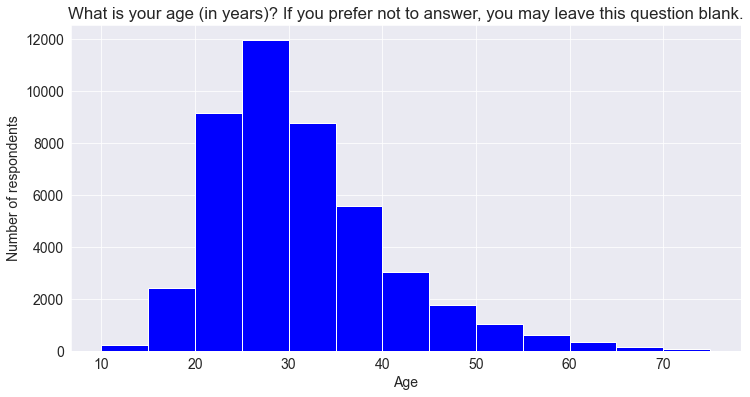

In [74]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='blue');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

### Gender

Let's look the distribution of respondents for the gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so, might expect to see a skewed distribution here.

In [75]:
schema_df.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [85]:
# Include the NaN value
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A Pie chart would be a great way to visualize this dietribution.

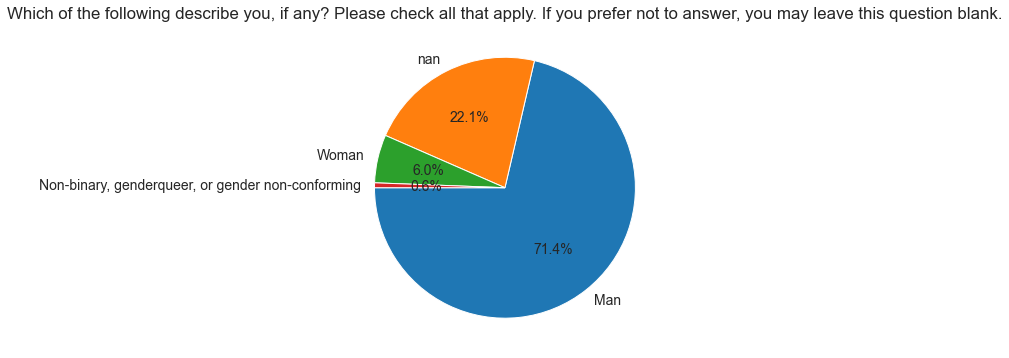

In [86]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%. 

In [87]:
# Exclude the NaN value
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

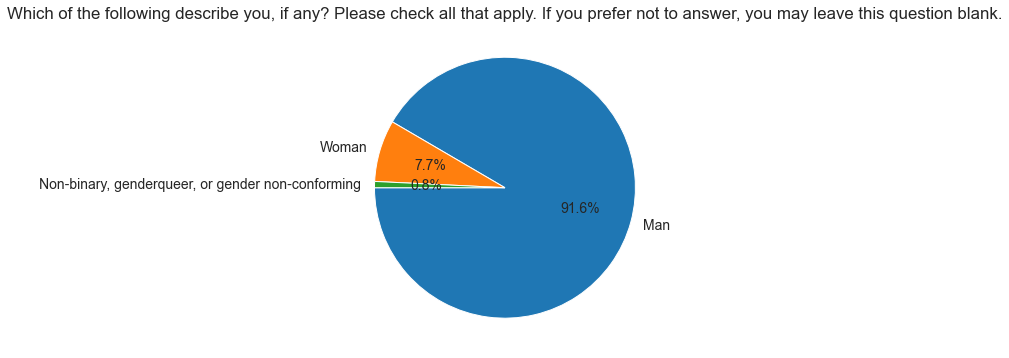

In [88]:
plt.figure(figsize=(12,6))
plt.title(schema_df.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. Use a horizontal bar plot here.

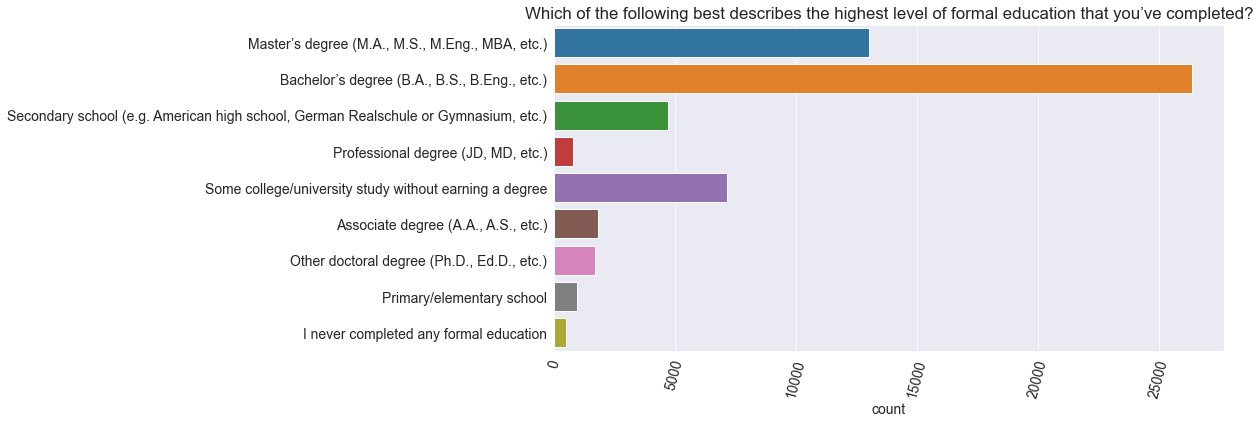

In [90]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema_df['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let's also plot undergraduate majors, but this time convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [91]:
schema_df.UndergradMajor

'What was your primary field of study?'

In [93]:
undergrad_precentaqe = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

In [94]:
undergrad_precentaqe

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

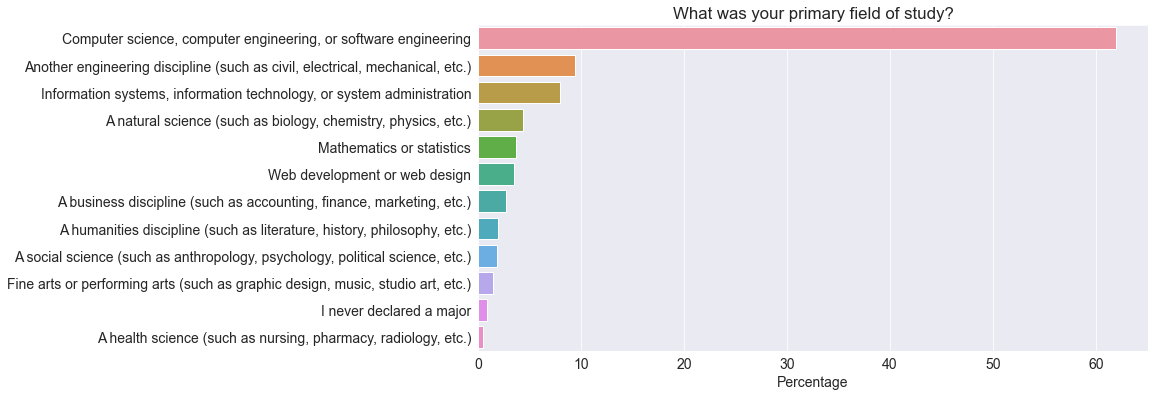

In [95]:
sns.barplot(x=undergrad_precentaqe, y=undergrad_precentaqe.index)
plt.title(schema_df.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, but not need to pursue a major in computer science to become a successful programmer.


### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time and freelance work. Let's visualize the data from the `Employment` column.

In [96]:
schema_df.Employment

'Which of the following best describes your current employment status?'

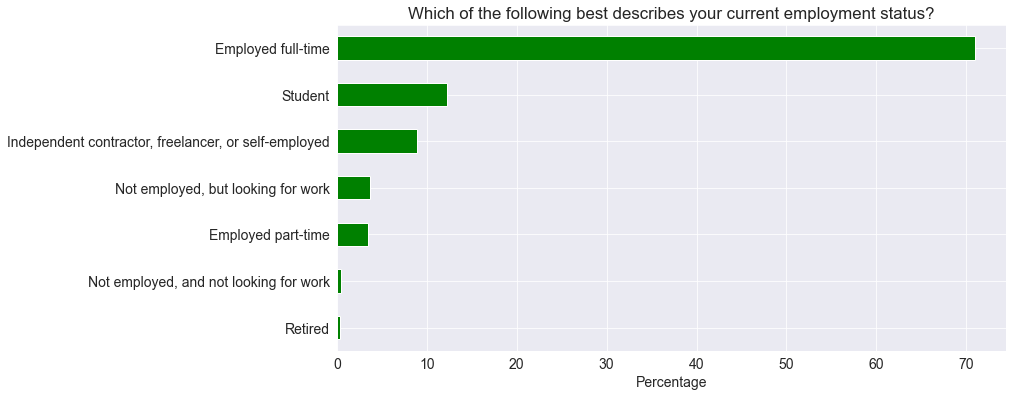

In [100]:
(survey_df.Employment.value_counts(normalize=True, ascending=True) * 100).plot(kind='barh', color='g')
plt.title(schema_df.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed as freelancers and near about 3% of respondents are employed as part-time.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by `;`, which makes it a bit harder to analyze firectly.

In [101]:
schema_df.DevType

'Which of the following describe you? Please select all that apply.'

In [102]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                4396
Developer, back-end                                                                                                                                                                                                  3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                       2214
Developer, back-end;Developer, full-stack                                                                                                                                                                            1465
Developer, front-end                                                                                                            

Now define a helper function which turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [115]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [116]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [117]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a respondent. If a respondent has selected the option, the value in the column is `True`, otherwise it is `False`.

Now use the column-wise totals to indetify the most common roles.

In [119]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expected, the most common roles include `Developer` in the name.

Let's save and uplod the work before continuing.

In [120]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joybarai09/eda-python-stackoverflow-annual-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey


'https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey'

### Asking and Answering Questions

Already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q. What are the most popular programming languages in 2020 ?

To answer this, use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [127]:
schema_df.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [121]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, split this column into a data frame containing a column of each language listed in the options.

In [122]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [123]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [124]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Plot this information using a horizontal bar chart.

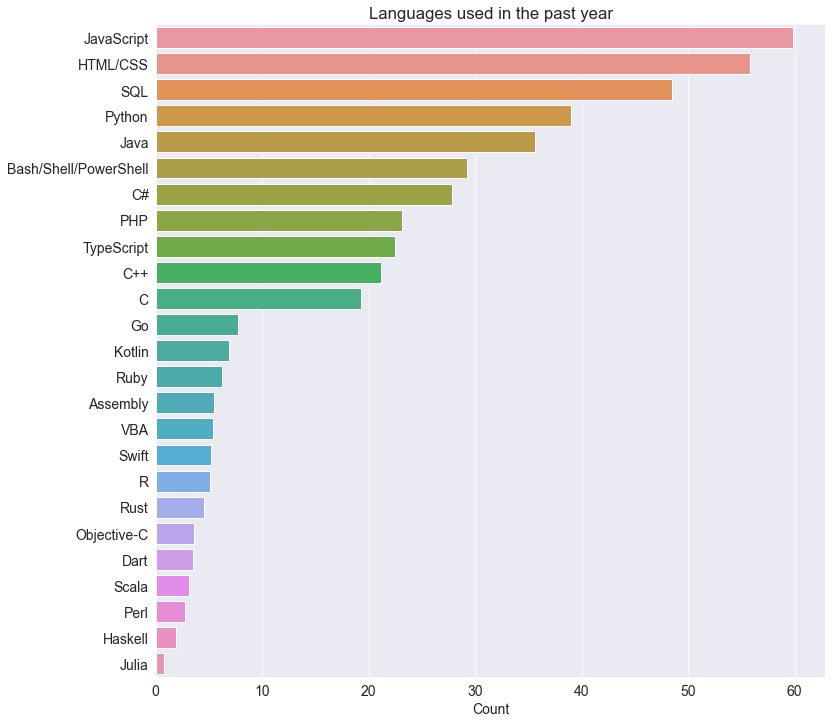

In [126]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('Count');

Unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Q. Which languages are the most people interested to learn over the next year ?

For this, can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [128]:
schema_df.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [129]:
survey_df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [130]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

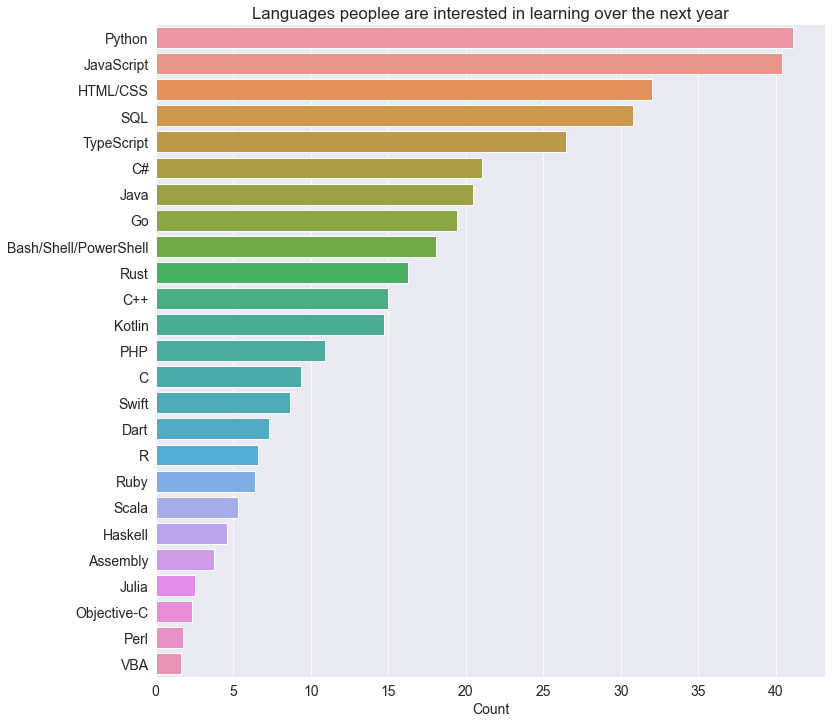

In [131]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title('Languages peoplee are interested in learning over the next year');
plt.xlabel('Count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. 

#### Q. Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning and using it over the next year ?

While the question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what can do with this:

> - Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`.
> - Take a column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who `love` the language.
> - Sort the results in decreasing order and plot a horizontal bar graph.

In [141]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_df

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
languages_loved_percentages = (languages_loved_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending=False)
languages_loved_percentages

Rust                     86.069824
TypeScript               67.114373
Python                   66.598884
Kotlin                   62.813276
Go                       62.176789
Dart                     62.068966
Julia                    61.431412
C#                       59.623021
Swift                    59.476346
JavaScript               58.353888
SQL                      56.607710
Bash/Shell/PowerShell    53.688241
HTML/CSS                 53.494594
Scala                    53.257651
Haskell                  51.378446
R                        44.427387
Java                     44.108273
C++                      43.415820
Ruby                     42.735896
PHP                      37.232755
C                        32.983023
Assembly                 29.089352
Perl                     28.369994
Objective-C              23.133362
VBA                      19.458057
dtype: float64

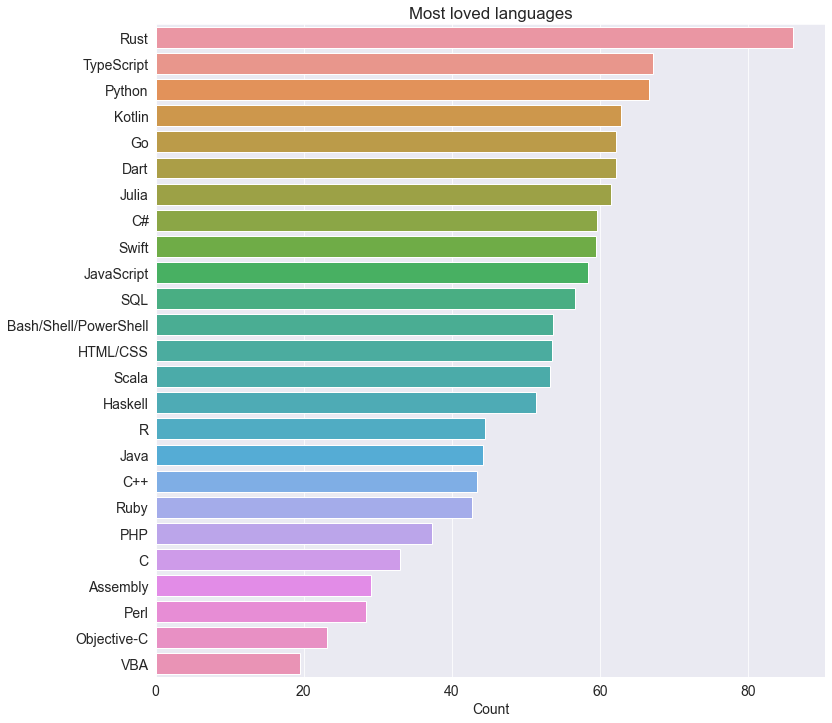

In [135]:
plt.figure(figsize=(12,12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title('Most loved languages');
plt.xlabel('Count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

#### Q. In which countries do developers work the highest number of hours per week ? Consider countries with more than 250 responses only.

To answer this question, need to use the `groupby` data frame method to aggregate the rows for each country. We'll need to filter the results to only include the countries with more than 250 respondents.

In [137]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [140]:
high_responses_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_responses_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

#### Q. How important is it to start young to build a career in programming ?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e. years of coding experience) to answer this question.


In [142]:
schema_df.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

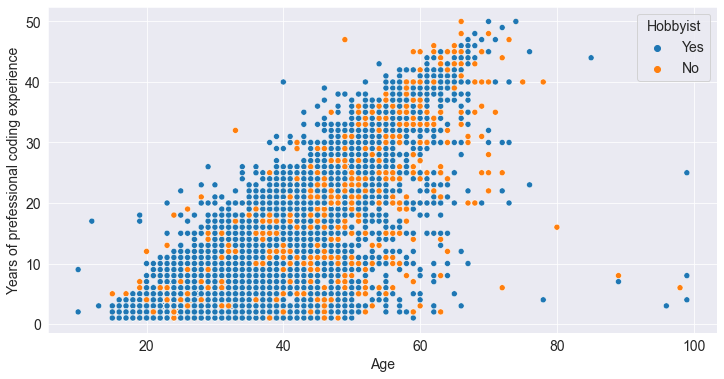

In [144]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel('Age')
plt.ylabel('Years of prefessional coding experience');

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

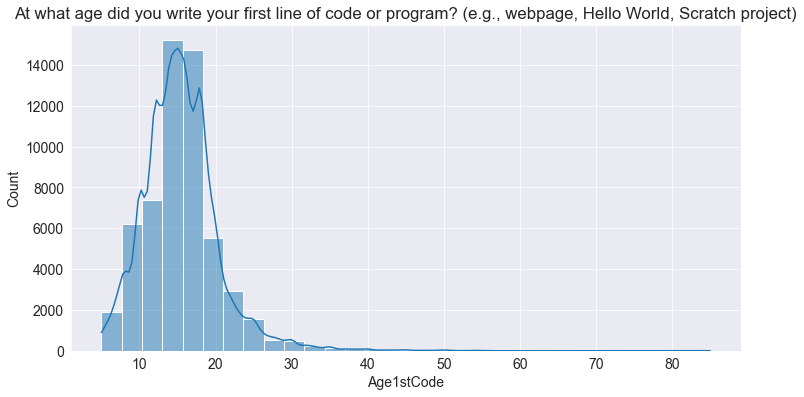

In [146]:
plt.title(schema_df.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have some exposure to programming before the age of 40. However, but there are some people of all ages and walks of life learning to code.

Let's save and commit the work before continuing.

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joybarai09/eda-python-stackoverflow-annual-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey


'https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey'

### Inferences and Conclusions

Drawn many inferences from this survey data. Here's a summary of a few of them:

- Based on the survey respondents' demographics, can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- Learn and start programming professionally at any age. Likely to have a long and fulfilling career if enjoy programming as a hobby.


### References and Future Works

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

Let's save and commit the work before continuing.

In [149]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "joybarai09/eda-python-stackoverflow-annual-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey


'https://jovian.ai/joybarai09/eda-python-stackoverflow-annual-survey'